# Testing of YOLOv8x Model on VisDrone Images

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Path to your trained model and test image
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt" # e.g., 'runs/detect/train/weights/best.pt'
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999993_00000_d_0000021.jpg"

# Load your trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)  # set show=True to open a window with the result

# Optionally, you can visualize the result using matplotlib:
# The results object contains annotated images. For example, to get the annotated image:
annotated_frame = results[0].plot()  # This returns a NumPy array with drawn predictions

# Convert BGR to RGB (if needed) and display using matplotlib
annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(annotated_frame)
plt.axis("off")
plt.title("Inference on a Single Image")
plt.show()


Skipping invalid class ID: 10.0
Skipping invalid class ID: 10.0
Skipping invalid class ID: 10.0
Skipping invalid class ID: 10.0
Skipping invalid class ID: 10.0
Skipping invalid class ID: 10.0


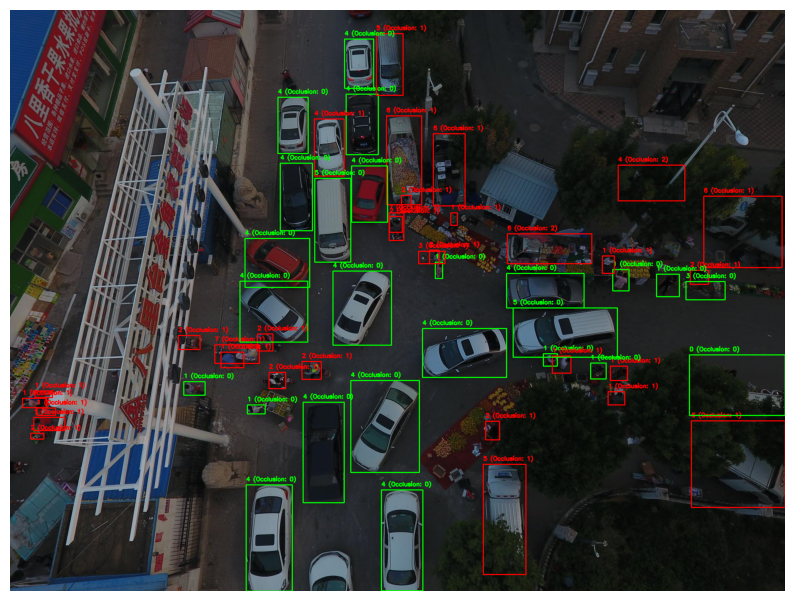

In [21]:
import cv2
import os
import matplotlib.pyplot as plt

# Set your paths
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg"
label_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\yolo_labels\9999999_00865_d_0000396.txt"

# Class mapping based on VisDrone dataset
class_names = [
    "pedestrian", "people", "bicycle", "car", "van",
    "truck", "tricycle", "awning-tricycle", "bus", "motor"
]

# Load image
image = cv2.imread(image_path)
height, width, _ = image.shape

# Read annotation file
with open(label_path, "r") as f:
    lines = f.readlines()

for line in lines:
    data = line.strip().split()
    
    # Ensure at least 6 elements exist
    if len(data) < 6:
        print(f"Skipping malformed annotation: {line}")
        continue  # Skip invalid lines

    cls, x_center, y_center, w, h, occlusion = map(float, data)
    
    # Ensure class ID is valid
    if int(cls) >= len(class_names) or int(cls) < 0:
        print(f"Skipping invalid class ID: {cls}")
        continue  # Skip invalid class ID

    # Convert YOLO format to bounding box format
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)

    # Draw the bounding box
    color = (0, 255, 0) if occlusion == 0 else (0, 0, 255)  # Green for normal, Red for occluded
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    label = f"{int(cls)} (Occlusion: {int(occlusion)})"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert BGR to RGB and display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()



image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg: 480x640 16 pedestrians, 5 peoples, 3 bicycles, 17 cars, 4 vans, 5 trucks, 2 tricycles, 7 motors, 1067.5ms
Speed: 5.0ms preprocess, 1067.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


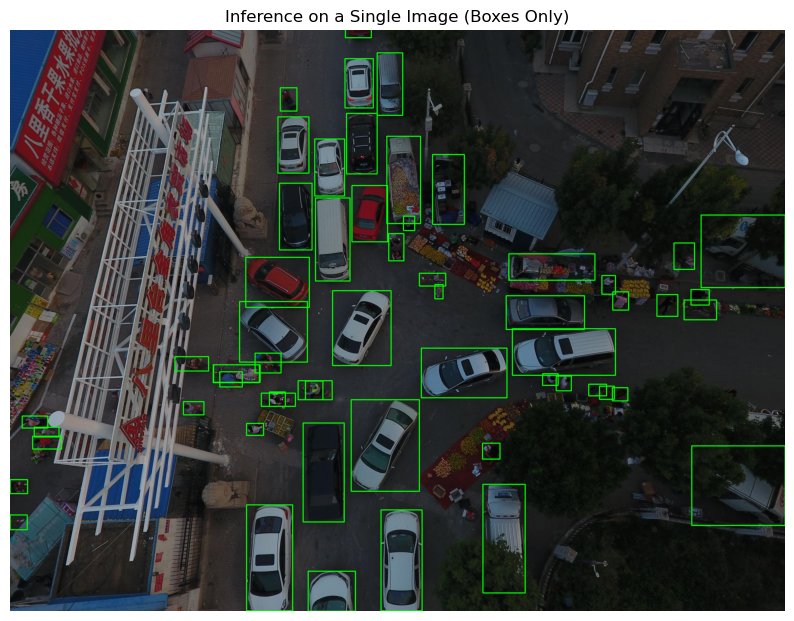

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Paths to your trained model and test image
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg"

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the original image (for drawing the boxes)
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load the image. Check the path.")

# Iterate over the predicted boxes and draw only the bounding boxes
# The 'results[0].boxes' contains all detected boxes.
for box in results[0].boxes:
    # box.xyxy is a tensor of shape [1, 4] with coordinates [x1, y1, x2, y2]
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    x1, y1, x2, y2 = map(int, coords)     # Convert coordinates to integers
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw a green box with thickness 2

# Convert image from BGR to RGB for correct display in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with only the boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Inference on a Single Image (Boxes Only)")
plt.show()


In [15]:
import os
import cv2
from collections import Counter

# Path to your training images
image_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images"

# List to store dimensions (width, height)
dimensions = []

# Iterate over image files in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        filepath = os.path.join(image_dir, filename)
        # Read the image using OpenCV
        img = cv2.imread(filepath)
        if img is None:
            print(f"Warning: Could not read image {filename}")
            continue
        # Get image dimensions (height, width, channels)
        height, width = img.shape[:2]
        dimensions.append((width, height))  # Storing as (width, height)

# Count how many times each dimension occurs
dim_counter = Counter(dimensions)

# Sort dimensions by count (highest frequency first)
sorted_dims = sorted(dim_counter.items(), key=lambda item: item[1], reverse=True)

print("Image dimensions (width x height) sorted by frequency (highest to lowest):")
for (w, h), count in sorted_dims:
    print(f"{w}x{h}: {count}")


Image dimensions (width x height) sorted by frequency (highest to lowest):
1400x1050: 2498
1400x788: 1299
2000x1500: 772
1360x765: 743
1916x1078: 537
1920x1080: 339
960x540: 250
1398x1048: 30
1344x756: 1
1389x1042: 1
480x360: 1


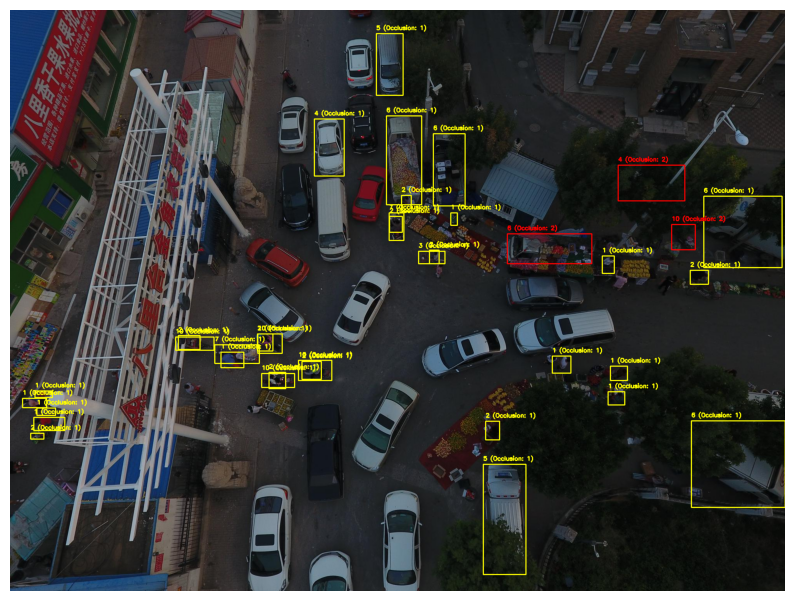

In [25]:
import cv2
import os
import matplotlib.pyplot as plt

# Set your paths
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg"
label_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\yolo_labels\9999999_00865_d_0000396.txt"

# Load image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load image from the given path.")
height, width, _ = image.shape

# Read annotation file
with open(label_path, "r") as f:
    lines = f.readlines()

for line in lines:
    data = line.strip().split()
    
    # Ensure at least 6 elements exist
    if len(data) < 6:
        print(f"Skipping malformed annotation: {line}")
        continue

    # Parse values: <class_id> <x_center> <y_center> <width> <height> <occlusion>
    cls, x_center, y_center, w, h, occlusion = map(float, data)
    
    # Process only if occlusion is 1 or 2
    if int(occlusion) not in [1, 2]:
        continue

    # Convert YOLO normalized coordinates to image pixel coordinates
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)

    # Assign different colors based on occlusion level
    if int(occlusion) == 1:
        color = (0, 255, 255)  # Yellow for occlusion level 1
    elif int(occlusion) == 2:
        color = (0, 0, 255)    # Red for occlusion level 2

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    # Display class number and occlusion level as the label
    label = f"{int(cls)} (Occlusion: {int(occlusion)})"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert BGR to RGB and display the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()



image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999993_00000_d_0000021.jpg: 480x640 2 pedestrians, 18 cars, 4 vans, 1 truck, 5 tricycles, 3 awning-tricycles, 6 buss, 19 motors, 1206.9ms
Speed: 11.0ms preprocess, 1206.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


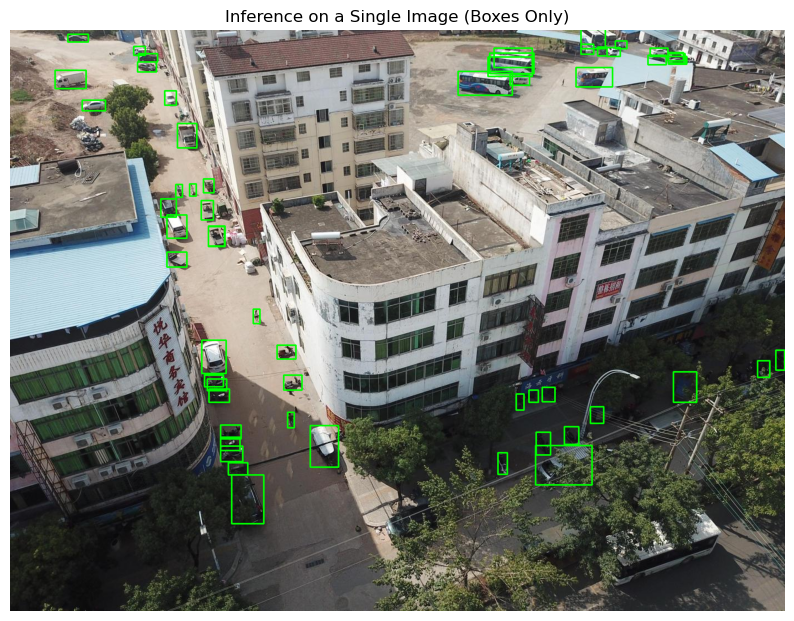

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Paths to your trained model and test image
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999993_00000_d_0000021.jpg"

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the original image (for drawing the boxes)
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load the image. Check the path.")

# Iterate over the predicted boxes and draw only the bounding boxes
# The 'results[0].boxes' contains all detected boxes.
for box in results[0].boxes:
    # box.xyxy is a tensor of shape [1, 4] with coordinates [x1, y1, x2, y2]
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    x1, y1, x2, y2 = map(int, coords)     # Convert coordinates to integers
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw a green box with thickness 2

# Convert image from BGR to RGB for correct display in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with only the boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Inference on a Single Image (Boxes Only)")
plt.show()


In [4]:
output_path = r"test1.jpg"
cv2.imwrite(output_path, image)

True


image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg: 480x640 7 pedestrians, 1 people, 13 cars, 11 motors, 921.1ms
Speed: 9.5ms preprocess, 921.1ms inference, 14.0ms postprocess per image at shape (1, 3, 480, 640)


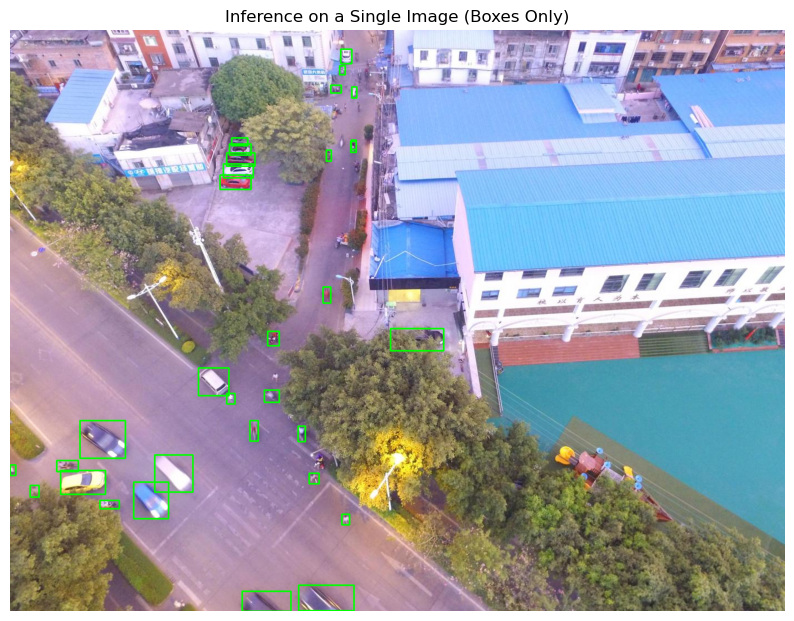

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Paths to your trained model and test image
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg"

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the original image (for drawing the boxes)
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load the image. Check the path.")

# Iterate over the predicted boxes and draw only the bounding boxes
# The 'results[0].boxes' contains all detected boxes.
for box in results[0].boxes:
    # box.xyxy is a tensor of shape [1, 4] with coordinates [x1, y1, x2, y2]
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    x1, y1, x2, y2 = map(int, coords)     # Convert coordinates to integers
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw a green box with thickness 2

# Convert image from BGR to RGB for correct display in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with only the boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Inference on a Single Image (Boxes Only)")
plt.show()



image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg: 480x640 7 pedestrians, 1 people, 13 cars, 11 motors, 853.5ms
Speed: 4.6ms preprocess, 853.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


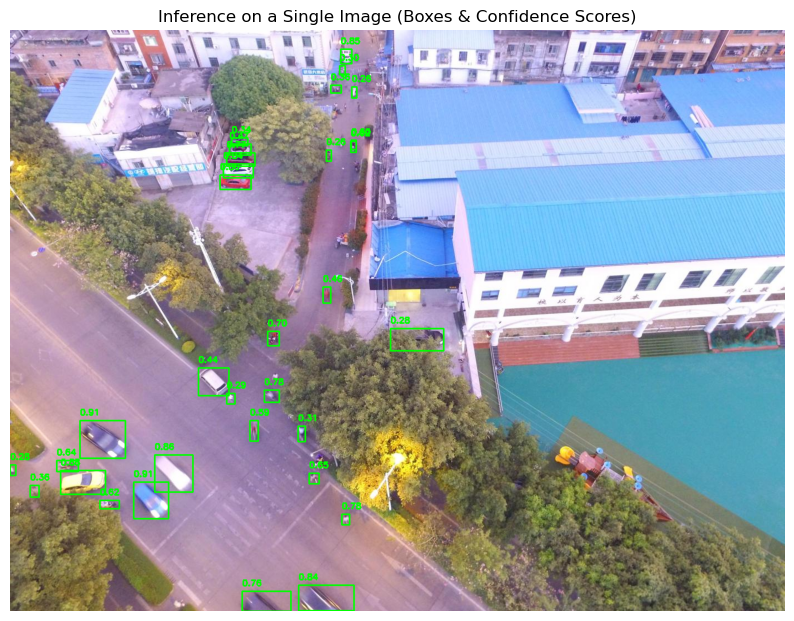

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Paths to your trained model and test image
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg"

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the original image (for drawing the boxes)
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load the image. Check the path.")

# Iterate over the predicted boxes and draw them with confidence scores
for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    confidence = box.conf[0].item()  # Extract confidence score
    x1, y1, x2, y2 = map(int, coords)  # Convert coordinates to integers
    
    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display confidence score
    label = f"{confidence:.2f}"  # Format confidence to 2 decimal places
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert image from BGR to RGB for correct display in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with boxes and confidence scores
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Inference on a Single Image (Boxes & Confidence Scores)")
plt.show()

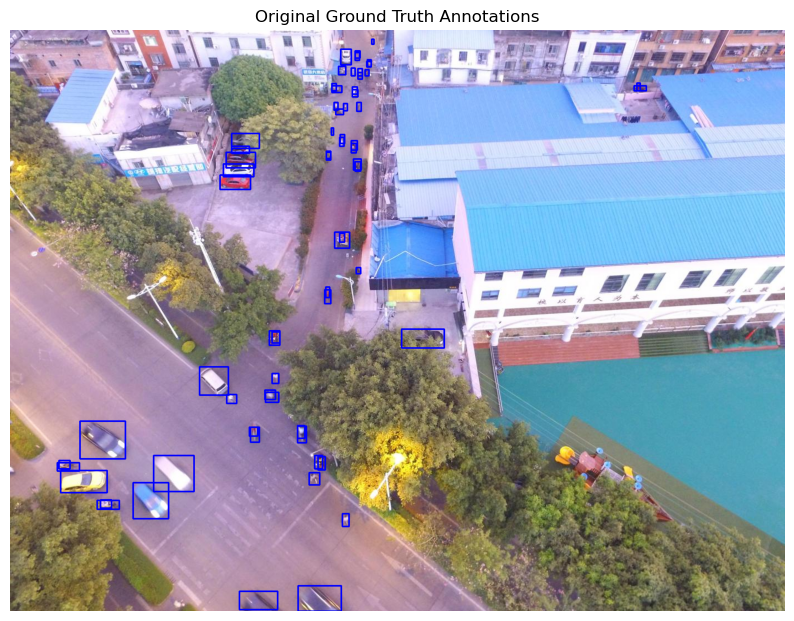

In [7]:
import cv2
import matplotlib.pyplot as plt
import os

# Paths to the test image and annotation file
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg"
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\annotations\9999979_00000_d_0000036.txt"

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load the image. Check the path.")

# Read and parse the annotation file
if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"Annotation file not found: {annotation_path}")

with open(annotation_path, "r") as f:
    lines = f.readlines()

# Draw ground truth bounding boxes
for line in lines:
    values = list(map(float, line.strip().split(",")))  # VisDrone format is comma-separated
    x, y, w, h = map(int, values[:4])  # Extract x, y, width, height

    # Convert from (x, y, w, h) to (x1, y1, x2, y2)
    x1, y1, x2, y2 = x, y, x + w, y + h

    # Draw bounding box (in BLUE for ground truth)
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Convert image from BGR to RGB for correct display in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with ground truth boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Original Ground Truth Annotations")
plt.show()


image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg: 480x640 7 pedestrians, 1 people, 13 cars, 11 motors, 817.7ms
Speed: 4.0ms preprocess, 817.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


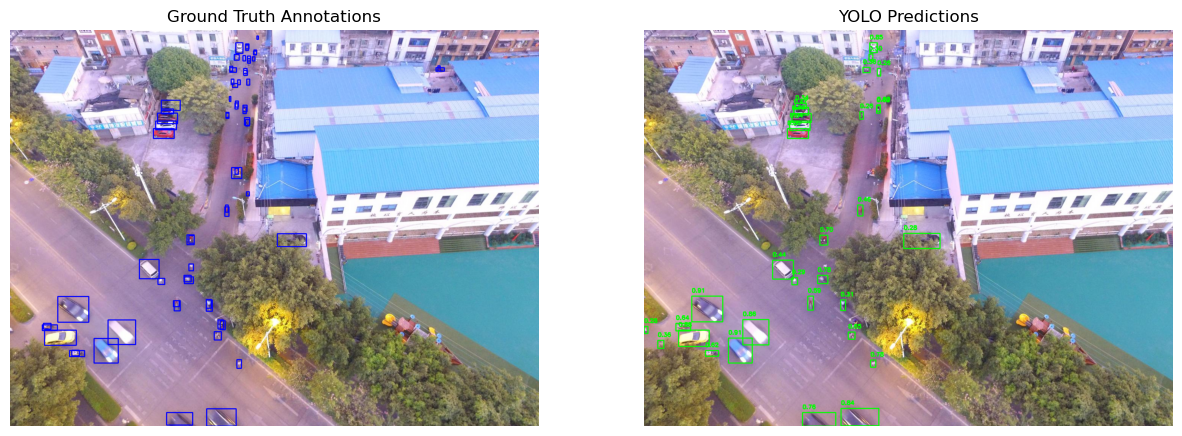

In [9]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Paths to the test image, annotation file, and trained model
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999979_00000_d_0000036.jpg"
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\annotations\9999979_00000_d_0000036.txt"
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed

# Load the image for ground truth
image_gt = cv2.imread(image_path)
if image_gt is None:
    raise ValueError("Could not load the image. Check the path.")

# Read and parse the annotation file
if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"Annotation file not found: {annotation_path}")

with open(annotation_path, "r") as f:
    lines = f.readlines()

# Draw ground truth bounding boxes (in BLUE)
for line in lines:
    values = list(map(float, line.strip().split(",")))  # VisDrone format is comma-separated
    x, y, w, h = map(int, values[:4])  # Extract x, y, width, height
    x1, y1, x2, y2 = x, y, x + w, y + h
    cv2.rectangle(image_gt, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue boxes

# Convert to RGB for display
image_gt = cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB)

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the image for model predictions
image_pred = cv2.imread(image_path)
if image_pred is None:
    raise ValueError("Could not load the image. Check the path.")

# Draw YOLO predictions (in GREEN)
for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    confidence = box.conf[0].item()  # Extract confidence score
    x1, y1, x2, y2 = map(int, coords)  # Convert coordinates to integers
    
    cv2.rectangle(image_pred, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green boxes
    label = f"{confidence:.2f}"  # Confidence score
    cv2.putText(image_pred, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert to RGB for display
image_pred = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)

# Plot both images side by side
plt.figure(figsize=(15, 7))

# Left: Ground truth annotations
plt.subplot(1, 2, 1)
plt.imshow(image_gt)
plt.axis("off")
plt.title("Ground Truth Annotations")

# Right: YOLO model predictions
plt.subplot(1, 2, 2)
plt.imshow(image_pred)
plt.axis("off")
plt.title("YOLO Predictions")

plt.show()


image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999986_00000_d_0000055.jpg: 480x640 15 pedestrians, 2 bicycles, 3 cars, 1 bus, 2 motors, 824.5ms
Speed: 4.0ms preprocess, 824.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


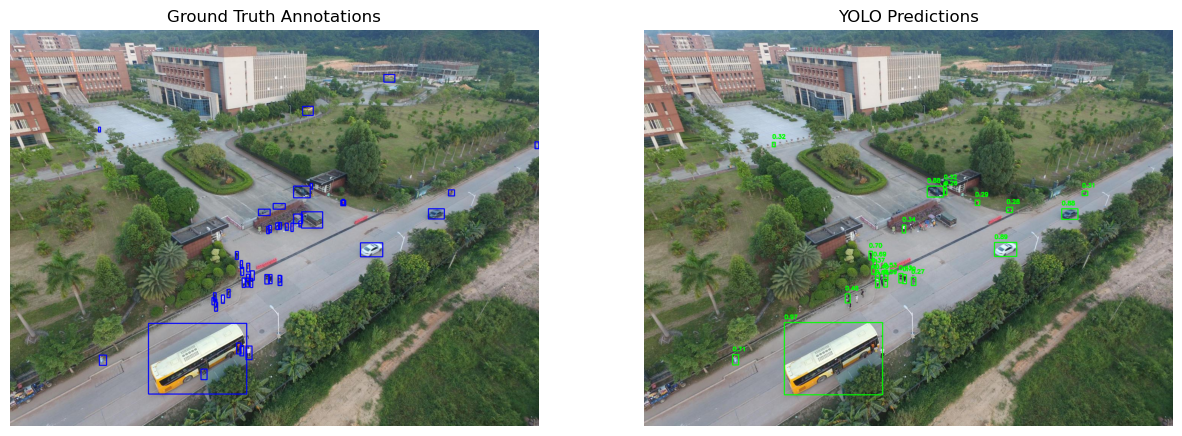

In [11]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Paths to the test image, annotation file, and trained model
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images\9999986_00000_d_0000055.jpg"
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\annotations\9999986_00000_d_0000055.txt"
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed

# Load the image for ground truth
image_gt = cv2.imread(image_path)
if image_gt is None:
    raise ValueError("Could not load the image. Check the path.")

# Read and parse the annotation file
if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"Annotation file not found: {annotation_path}")

with open(annotation_path, "r") as f:
    lines = f.readlines()

# Draw ground truth bounding boxes (in BLUE)
for line in lines:
    values = list(map(float, line.strip().split(",")))  # VisDrone format is comma-separated
    x, y, w, h = map(int, values[:4])  # Extract x, y, width, height
    x1, y1, x2, y2 = x, y, x + w, y + h
    cv2.rectangle(image_gt, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue boxes

# Convert to RGB for display
image_gt = cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB)

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the image for model predictions
image_pred = cv2.imread(image_path)
if image_pred is None:
    raise ValueError("Could not load the image. Check the path.")

# Draw YOLO predictions (in GREEN)
for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    confidence = box.conf[0].item()  # Extract confidence score
    x1, y1, x2, y2 = map(int, coords)  # Convert coordinates to integers
    
    cv2.rectangle(image_pred, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green boxes
    label = f"{confidence:.2f}"  # Confidence score
    cv2.putText(image_pred, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert to RGB for display
image_pred = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)

# Plot both images side by side
plt.figure(figsize=(15, 7))

# Left: Ground truth annotations
plt.subplot(1, 2, 1)
plt.imshow(image_gt)
plt.axis("off")
plt.title("Ground Truth Annotations")

# Right: YOLO model predictions
plt.subplot(1, 2, 2)
plt.imshow(image_pred)
plt.axis("off")
plt.title("YOLO Predictions")

plt.show()


image 1/1 C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg: 480x640 16 pedestrians, 5 peoples, 3 bicycles, 17 cars, 4 vans, 5 trucks, 2 tricycles, 7 motors, 809.8ms
Speed: 3.0ms preprocess, 809.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


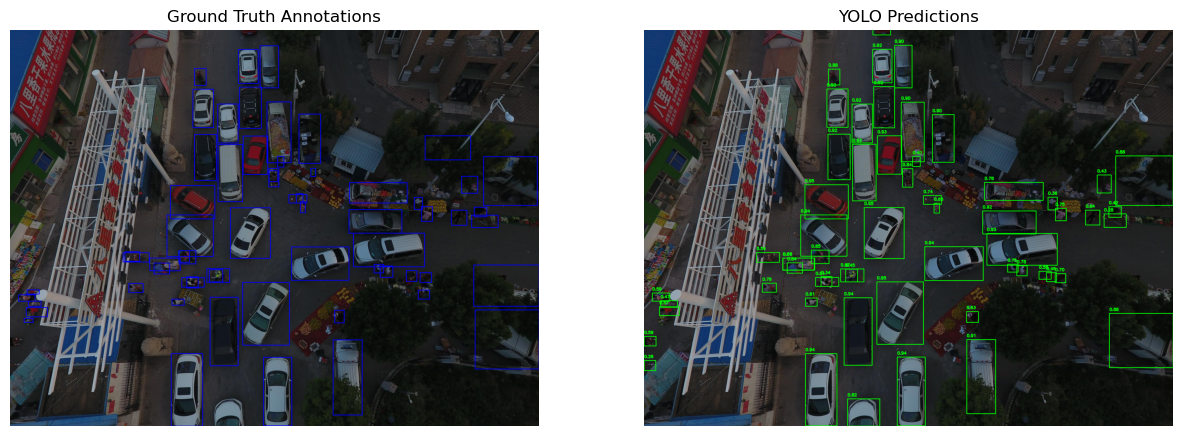

In [13]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Paths to the test image, annotation file, and trained model
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg"
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\annotations\9999999_00865_d_0000396.txt"
model_path = r"C:\Users\jmdgo\Downloads\visocc.pt"  # Update if needed

# Load the image for ground truth
image_gt = cv2.imread(image_path)
if image_gt is None:
    raise ValueError("Could not load the image. Check the path.")

# Read and parse the annotation file
if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"Annotation file not found: {annotation_path}")

with open(annotation_path, "r") as f:
    lines = f.readlines()

# Draw ground truth bounding boxes (in BLUE)
for line in lines:
    values = list(map(float, line.strip().split(",")))  # VisDrone format is comma-separated
    x, y, w, h = map(int, values[:4])  # Extract x, y, width, height
    x1, y1, x2, y2 = x, y, x + w, y + h
    cv2.rectangle(image_gt, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue boxes

# Convert to RGB for display
image_gt = cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB)

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Run inference on the image
results = model.predict(source=image_path, show=False)

# Load the image for model predictions
image_pred = cv2.imread(image_path)
if image_pred is None:
    raise ValueError("Could not load the image. Check the path.")

# Draw YOLO predictions (in GREEN)
for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy()  # Convert tensor to numpy array
    confidence = box.conf[0].item()  # Extract confidence score
    x1, y1, x2, y2 = map(int, coords)  # Convert coordinates to integers
    
    cv2.rectangle(image_pred, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green boxes
    label = f"{confidence:.2f}"  # Confidence score
    cv2.putText(image_pred, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert to RGB for display
image_pred = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)

# Plot both images side by side
plt.figure(figsize=(15, 7))

# Left: Ground truth annotations
plt.subplot(1, 2, 1)
plt.imshow(image_gt)
plt.axis("off")
plt.title("Ground Truth Annotations")

# Right: YOLO model predictions
plt.subplot(1, 2, 2)
plt.imshow(image_pred)
plt.axis("off")
plt.title("YOLO Predictions")

plt.show()